In [34]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
start = datetime.datetime(2018,1,6)
end = datetime.datetime(2021,1,6)
stockticker = 'GME'
shortwindow = 50 #the short MA 
longwindow = 200 #the long MA 

In [36]:
stock = web.DataReader(stockticker, 'yahoo', start, end)


In [37]:
shortMA = pd.DataFrame()
longMA = pd.DataFrame()
shortMA['Close'] = stock['Close'].rolling(window=shortwindow).mean()
longMA['Close'] = stock['Close'].rolling(window = longwindow).mean()

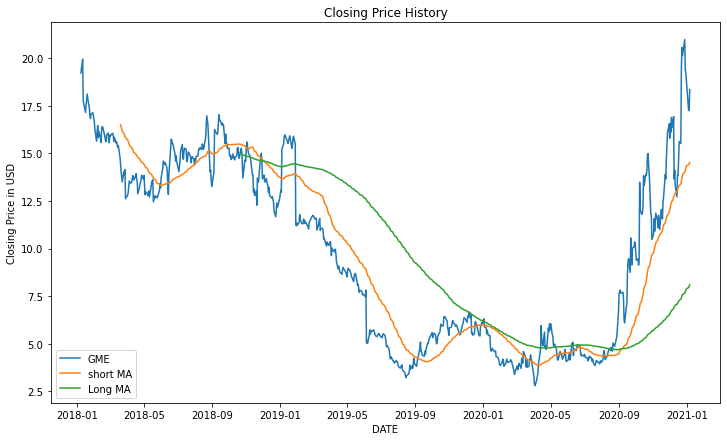

In [46]:
plt.figure(figsize= (12,7))
plt.plot(stock['Close'], label = stockticker)
plt.plot(shortMA['Close'], label = 'short MA')
plt.plot(longMA['Close'], label = 'Long MA')
plt.xlabel('DATE')
plt.ylabel('Closing Price in USD')
plt.legend()
plt.title('Closing Price History')
plt.show()


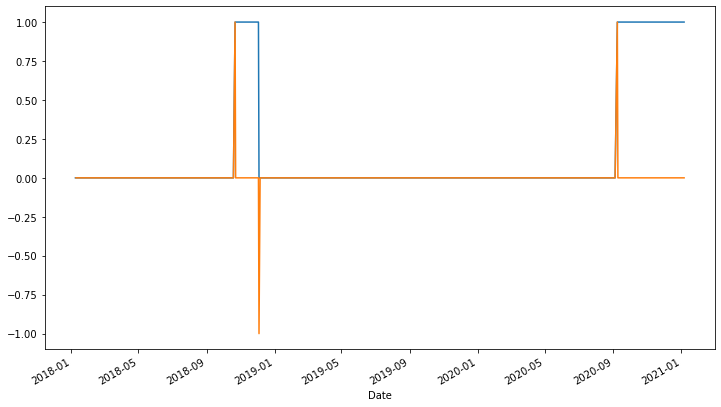

In [53]:
x = (shortMA['Close'] > longMA['Close']).astype(int)
y = x.diff() #the derivative 
crossover = pd.DataFrame()
crossover['Stockticker'] = stock['Close']
crossover['buy'] = stock['Close'] [y>0]
crossover['sell'] = stock['Close'] [y>0]
x.plot(figsize = (12,7))
y.plot()
plt.show()

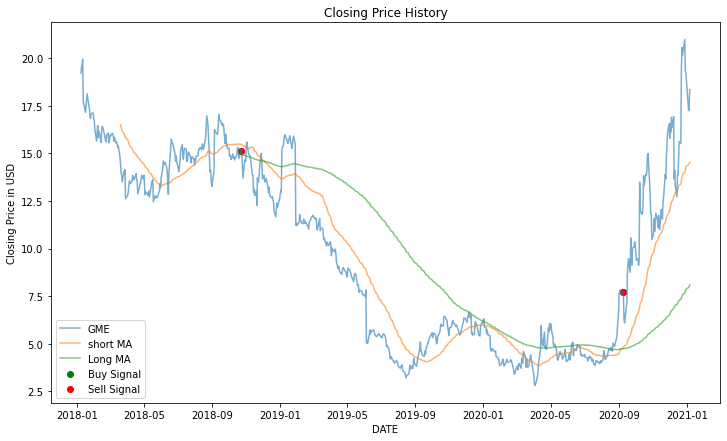

In [57]:
plt.figure(figsize= (12,7))
plt.plot(stock['Close'], label = stockticker, alpha = 0.6)
plt.plot(shortMA['Close'], label = 'short MA',alpha = 0.6)
plt.plot(longMA['Close'], label = 'Long MA',alpha = 0.6)
plt.scatter(crossover['buy'].index,crossover['buy'], label = 'Buy Signal', color = 'g')
plt.scatter(crossover['sell'].index,crossover['sell'], label = 'Sell Signal', color = 'r')
plt.xlabel('DATE')
plt.ylabel('Closing Price in USD')
plt.legend()
plt.title('Closing Price History')
plt.show()